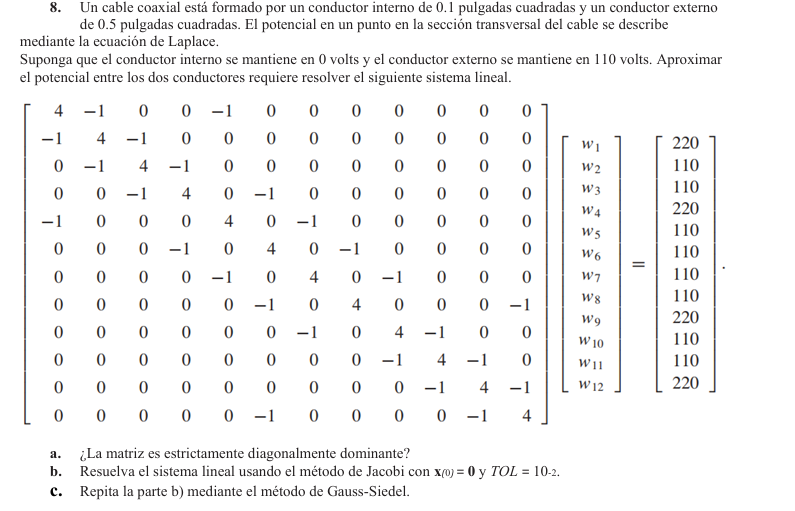

In [1]:
import numpy as np

# Definir la matriz del sistema
A = np.array([
    [4, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0],
    [-1, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, -1, 4, -1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, -1, 4, 0, -1, 0, 0, 0, 0, 0],
    [-1, 0, 0, 0, 4, 0, -1, 0, 0, 0, 0],
    [0, 0, 0, -1, 0, 4, 0, -1, 0, 0, 0],
    [0, 0, 0, 0, -1, 0, 4, 0, -1, 0, 0],
    [0, 0, 0, 0, 0, -1, 0, 4, 0, 0, -1],
    [0, 0, 0, 0, 0, 0, -1, 0, 4, -1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 4, -1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 4]
])

# Definir el vector b
b = np.array([220, 110, 110, 220, 110, 110, 110, 220, 110, 110, 220])

# Verificar diagonal dominante
def es_diagonal_dominante(A):
    diagonal = np.diag(np.abs(A))
    suma_filas = np.sum(np.abs(A), axis=1) - diagonal
    return np.all(diagonal > suma_filas)

print("=== Literal a: ¿Es la matriz estrictamente diagonal dominante? ===")
print("Resultado:", "Sí" if es_diagonal_dominante(A) else "No")

=== Literal a: ¿Es la matriz estrictamente diagonal dominante? ===
Resultado: Sí


In [2]:
def jacobi(A, b, tol=10, max_iter=1000, x0=None):
    n = len(b)
    if x0 is None:
        x0 = np.zeros(n)
    
    x = x0.copy()
    x_new = np.zeros(n)
    errors = []
    
    print("\n=== Literal b: Método de Jacobi (TOL=10) ===")
    print("Iteración | Error")
    print("------------------")
    
    for k in range(max_iter):
        for i in range(n):
            sigma = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sigma) / A[i, i]
        
        error = np.linalg.norm(A @ x_new - b)
        errors.append(error)
        
        if k % 100 == 0 or error < tol:
            print(f"{k:5d}    | {error:.4f}")
        
        if error < tol:
            break
            
        x = x_new.copy()
    
    return x_new, errors

# Aplicar Jacobi
x_jacobi, errors_jacobi = jacobi(A, b)

# Mostrar solución final
print("\nSolución final (Jacobi):")
print(np.round(x_jacobi, 2))


=== Literal b: Método de Jacobi (TOL=10) ===
Iteración | Error
------------------
    0    | 242.8734
    5    | 6.0672

Solución final (Jacobi):
[86.34 64.86 65.34 88.7  62.76 71.73 56.69 89.97 55.91 58.57 69.48]


In [4]:
def gauss_seidel(A, b, tol=10, max_iter=1000, x0=None):
    n = len(b)
    if x0 is None:
        x0 = np.zeros(n)
    
    x = x0.copy()
    errors = []
    
    print("\n=== Literal c: Método de Gauss-Seidel (TOL=10) ===")
    print("Iteración | Error")
    print("------------------")
    
    for k in range(max_iter):
        x_old = x.copy()
        for i in range(n):
            sigma = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x_old[i+1:])
            x[i] = (b[i] - sigma) / A[i, i]
        
        error = np.linalg.norm(A @ x - b)
        errors.append(error)
        
        if k % 50 == 0 or error < tol:
            print(f"{k:5d}    | {error:.4f}")
        
        if error < tol:
            break
    
    return x, errors

# Aplicar Gauss-Seidel
x_gs, errors_gs = gauss_seidel(A, b)

# Mostrar solución final
print("\nSolución final (Gauss-Seidel):")
print(np.round(x_gs, 2))




=== Literal c: Método de Gauss-Seidel (TOL=10) ===
Iteración | Error
------------------
    0    | 176.1248
    3    | 5.7367

Solución final (Gauss-Seidel):
[85.88 64.78 65.4  89.09 62.74 72.27 56.99 90.48 56.39 59.01 69.75]
